<center> 
<h1>ColorToBin</h1>
<p>Summary</p>
<h2>Andrew J. Ribeiro</h2>
</center>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from PIL import Image
%matplotlib inline  

In [2]:
    srcPhotoExt = ".jpg"
    srcPhoto = "Source/rosie"

    im = Image.open(srcPhoto+srcPhotoExt)
    im.save(srcPhoto+".png")
    img=mpimg.imread(srcPhoto+".png")

<matplotlib.colorbar.Colorbar instance at 0x10756dcf8>

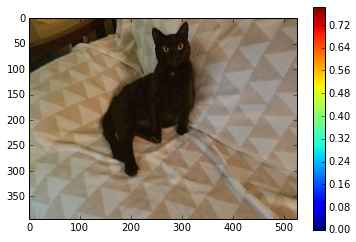

In [10]:
plt.imshow(img)
plt.colorbar()

Task 1: Create color bins. 

In [4]:
binMaxSize = 255
binSize = 20 

def makeBins(binMax, binWidth, binMin = np.float32(0)):
    bins = []
    
    while binMin < binMax:
        if binMin+binWidth > binMax:
            binWidth = binMax - binMin
        bins.append( (binMin,binMin+binWidth) )
        binMin += np.float32(binWidth)
    
    
    return bins

print( makeBins( binMaxSize, binSize))



[(0.0, 20.0), (20.0, 40.0), (40.0, 60.0), (60.0, 80.0), (80.0, 100.0), (100.0, 120.0), (120.0, 140.0), (140.0, 160.0), (160.0, 180.0), (180.0, 200.0), (200.0, 220.0), (220.0, 240.0), (240.0, 255.0)]


In [5]:
print(img)

[[[ 0.37254903  0.25490198  0.10588235]
  [ 0.36862746  0.25490198  0.09803922]
  [ 0.37254903  0.25882354  0.09411765]
  ..., 
  [ 0.57254905  0.45490196  0.36078432]
  [ 0.56862748  0.4509804   0.34901962]
  [ 0.56862748  0.44313726  0.34509805]]

 [[ 0.36862746  0.25098041  0.10196079]
  [ 0.38431373  0.27058825  0.11372549]
  [ 0.40000001  0.28627452  0.12156863]
  ..., 
  [ 0.56078434  0.44313726  0.34117648]
  [ 0.5529412   0.43529412  0.33333334]
  [ 0.54901963  0.42352942  0.32549021]]

 [[ 0.37254903  0.25490198  0.10588235]
  [ 0.39607844  0.28235295  0.1254902 ]
  [ 0.42352942  0.30980393  0.14509805]
  ..., 
  [ 0.54901963  0.44313726  0.33725491]
  [ 0.54509807  0.42745098  0.32549021]
  [ 0.53725493  0.41960785  0.31764707]]

 ..., 
 [[ 0.59215689  0.60000002  0.54509807]
  [ 0.58039218  0.58823532  0.53333336]
  [ 0.55686277  0.57254905  0.51764709]
  ..., 
  [ 0.5529412   0.43921569  0.28235295]
  [ 0.56862748  0.4509804   0.3019608 ]
  [ 0.57647061  0.45882353  0.31764

In [6]:
makeBins(1,.10)


[(0.0, 0.10000000000000001),
 (0.1, 0.20000000149011612),
 (0.2, 0.30000000298023222),
 (0.30000001, 0.40000001192092893),
 (0.40000001, 0.50000000596046446),
 (0.5, 0.59999999999999998),
 (0.60000002, 0.70000002384185789),
 (0.70000005, 0.8000000476837158),
 (0.80000007, 0.90000007152557371),
 (0.9000001, 1.0)]

In [29]:
imgShape = img.shape
imgVec = img.flatten()

bins = makeBins(1,.10)
variants = []

for bin in bins:
    imgCpy = imgVec.copy().reshape(-1,img.shape[-1])
    counter = 0
    while counter < imgCpy.shape[0]:
        if (imgCpy[counter][0] >= bin[0] and imgCpy[counter][0] < bin[1]) or (imgCpy[counter][1] >= bin[0] and imgCpy[counter][1] < bin[1]) or (imgCpy[counter][2] >= bin[0] and imgCpy[counter][2] < bin[1]) :
            #Make pixel white 
            imgCpy[counter] = [1,1,1]
        else:
            #Make pixel black. 
            imgCpy[counter] = [0,0,0]
        counter += 1
        
    variants.append(imgCpy)

In [20]:
print( img.reshape(-1,img.shape[-1]).shape )
print("N-variants: ", len(variants) )

(207244, 3)
('N-variants: ', 10)


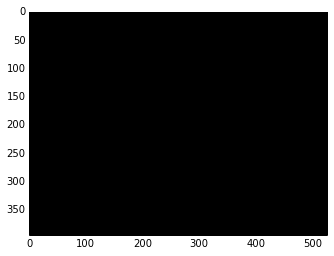

In [40]:
plt.imshow( variants[9].reshape(imgShape) )

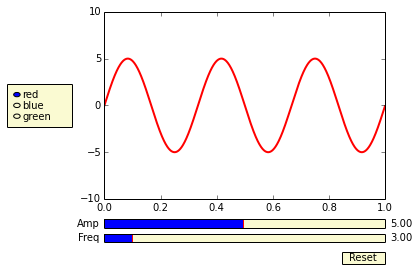